# LAB 3

### Question 1.

It's a regression problem (even if the potential number of passenger is discrete + finite, there is too much categories to be a classification). It's supervised, 
we have a dataset with features and labels.

### Question 2.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/Users/thom/Downloads/train.csv.bz2', compression='bz2')

In [10]:
df.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8902 entries, 0 to 8901
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DateOfDeparture   8902 non-null   object 
 1   Departure         8902 non-null   object 
 2   Arrival           8902 non-null   object 
 3   WeeksToDeparture  8902 non-null   float64
 4   log_PAX           8902 non-null   float64
 5   std_wtd           8902 non-null   float64
dtypes: float64(3), object(3)
memory usage: 417.4+ KB


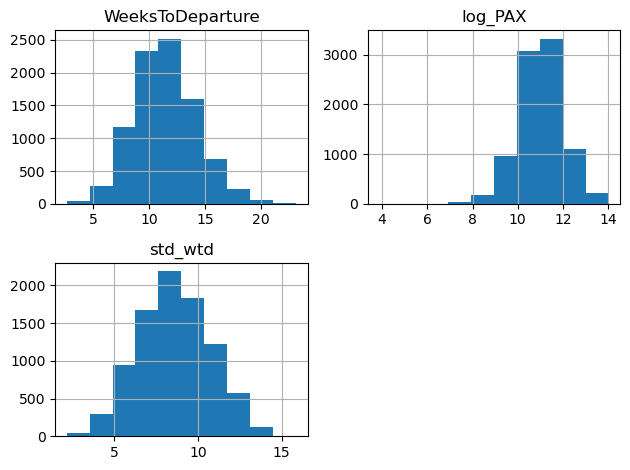

In [12]:
df.hist()
plt.tight_layout()

### Question 3

In [13]:
df["DateOfDeparture"] = pd.to_datetime(df["DateOfDeparture"])
df.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159


In [14]:
pip install holidays

Note: you may need to restart the kernel to use updated packages.


In [15]:
import holidays
us_holidays = holidays.US(years=[2011,2012,2013])


df['Day'] = df['DateOfDeparture'].dt.day
df['DayOfWeek'] = df['DateOfDeparture'].dt.weekday + 1
df['Month'] = df['DateOfDeparture'].dt.month
df['Week'] = df['DateOfDeparture'].dt.isocalendar().week
df['BankHolidays'] = df['DateOfDeparture'].isin(us_holidays).astype(int)
df['Weekend'] = df['DayOfWeek'].isin([6,7]).astype(int)

/var/folders/dr/m9v4shms079d9s6z6c8cg57m0000gn/T/ipykernel_41976/2208875591.py:9: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['BankHolidays'] = df['DateOfDeparture'].isin(us_holidays).astype(int)


In [16]:
df.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd,Day,DayOfWeek,Month,Week,BankHolidays,Weekend
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647,19,2,6,25,0,0
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734,10,1,9,37,0,0
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883,5,5,10,40,0,0
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202,9,7,10,40,0,1
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159,21,2,2,8,0,0


In [17]:
duplicates = df["DateOfDeparture"].value_counts() #checking if there are several flights a day since there are 363 BankHolidays
print(duplicates)

DateOfDeparture
2012-11-07    26
2013-01-28    26
2013-01-05    25
2012-01-12    25
2012-11-28    25
              ..
2013-02-27     8
2011-11-25     8
2012-05-04     8
2012-06-09     7
2012-10-23     5
Name: count, Length: 552, dtype: int64


### Question 4.

In [18]:
numerical_columns = df.select_dtypes([float, int])
print(numerical_columns)

      WeeksToDeparture    log_PAX    std_wtd  Day  DayOfWeek  Month  \
0            12.875000  12.331296   9.812647   19          2      6   
1            14.285714  10.775182   9.466734   10          1      9   
2            10.863636  11.083177   9.035883    5          5     10   
3            11.480000  11.169268   7.990202    9          7     10   
4            11.450000  11.269364   9.517159   21          2      2   
...                ...        ...        ...  ...        ...    ...   
8897          9.263158  10.427055   7.316967    2          7     10   
8898         12.772727  12.201552  10.641034   25          2      9   
8899         11.047619  10.508746   7.908705   19          4      1   
8900          6.076923  10.174042   4.030334    3          7      2   
8901          9.526316   9.202674   6.167733   26          6     11   

      BankHolidays  Weekend  
0                0        0  
1                0        0  
2                0        0  
3                0        1

### Question 5.

$ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} $


The interest of using RMSE here instead of OLSE is that RMSE is particularly sensitive to large errors due to the squaring of the residuals.

### Question 6.

In [19]:
def RMSE(y, y_hat):

    _ = y - y_hat
    sum = np.sum(_**2)

    return np.sqrt(sum/len(y))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

max_depth = 3
tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)

In [21]:
target = df["log_PAX"]
data = numerical_columns.drop(columns = ["log_PAX"])

data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0,
)

In [22]:
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [23]:
y_hat = tree.predict(data_test)

In [24]:
RMSE(target_test, y_hat)

0.83841534031724

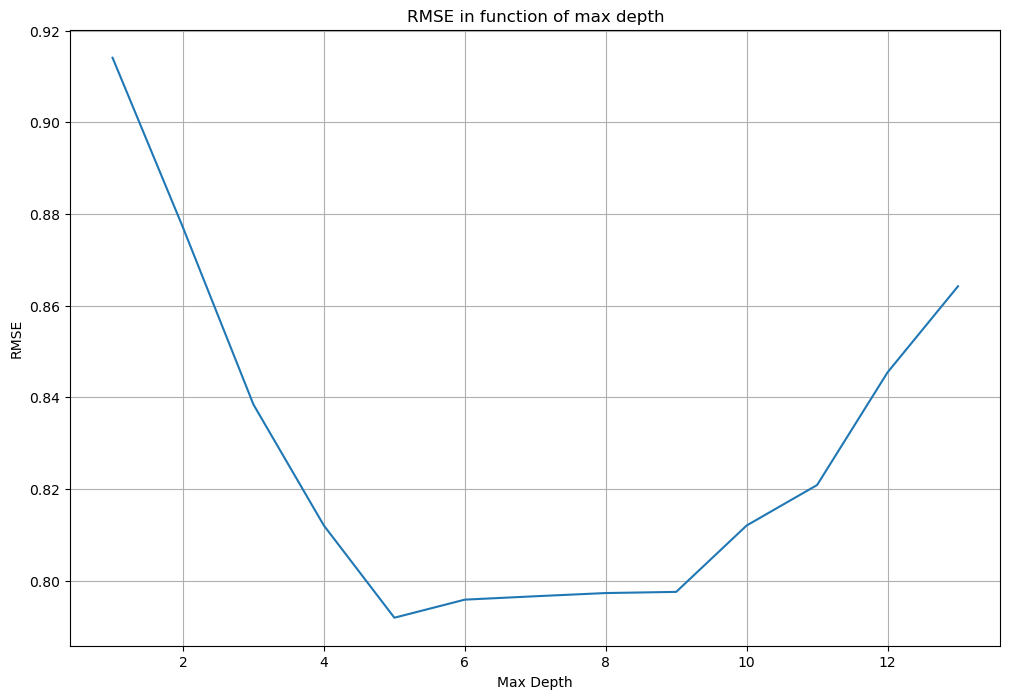

In [25]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

plt.figure(figsize=(12, 8))

results = []
for i in max_depths:
    tree = DecisionTreeRegressor(max_depth=i, random_state=0)
    tree.fit(data_train, target_train)
    error = RMSE(target_test, tree.predict(data_test))
    results.append(error)
plt.plot(max_depths, results)

plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.title('RMSE in function of max depth')
plt.grid()
plt.show()

The DecisionTreeRegressor operates by splitting the training data based on feature values to create a tree structure : Each internal node of the tree represents a decision based on a feature, and each branch represents the outcome of that decision. Leaf nodes represent the predicted value.

As we can see, the best results are obtained for max depth = 5. Let's take this number for the following quesitons.

In [26]:
max_depth = 5
tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
tree.fit(data_train, target_train)
y_hat = tree.predict(data_test)
error = RMSE(target_test, y_hat)
print(error)



0.7919032120869068


### Question 7.

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), DecisionTreeRegressor(max_depth=5, random_state=0))

model.fit(data_train, target_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=0))])

In [28]:
y_hat = model.predict(data_test)
error = RMSE(target_test, y_hat)
print(error)

0.7919032120869068


The error doesn't change whether we applied a scaling transformation or not. This is because the scale has no impact on the decision tree : the separations induced
by the differents nodes of the tree will just be homotheties of the previous one.

### Question 8.

In [29]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

model = make_pipeline(LinearRegression(fit_intercept=True))

model.fit(data_train, target_train)
y_hat = model.predict(data_test)
error = RMSE(target_test, y_hat)
print(error)
print(model.named_steps['linearregression'].coef_)

0.8835516877667207
[ 0.1310084  -0.0901306  -0.00183454  0.0259709  -0.00827154 -0.610035
 -1.00041842]


In [30]:
model = make_pipeline(StandardScaler(), LinearRegression(fit_intercept=True))

model.fit(data_train, target_train)
y_hat = model.predict(data_test)
error = RMSE(target_test, y_hat)
print(error)
print(model.named_steps['linearregression'].coef_)

0.8835516877667207
[ 0.36600367 -0.19318409 -0.01629614  0.05187559 -0.03156259 -0.12249317
 -0.44879821]


Here, the error doesn't change because in the way it's computed if you scale both y and y_hat, the error doesn't change. On the other hand, as we can see, the coefficients did change.

### Question 9.

In [31]:
df_categorical = df.select_dtypes([object])
print(df_categorical)

     Departure Arrival
0          ORD     DFW
1          LAS     DEN
2          DEN     LAX
3          ATL     ORD
4          DEN     SFO
...        ...     ...
8897       DTW     ATL
8898       DFW     ORD
8899       SFO     LAS
8900       ORD     PHL
8901       DTW     ATL

[8902 rows x 2 columns]


In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(df_categorical)
print(f"The dataset encoded contains {data_encoded.shape[1]} features")
data_encoded

The dataset encoded contains 40 features


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
df.head()

,DateOfDeparture,Departure,Arrival,WeeksToDeparture,log_PAX,std_wtd,Day,DayOfWeek,Month,Week,BankHolidays,Weekend
0,2012-06-19,ORD,DFW,12.875000,12.331296,9.812647,19,2,6,25,0,0
1,2012-09-10,LAS,DEN,14.285714,10.775182,9.466734,10,1,9,37,0,0
2,2012-10-05,DEN,LAX,10.863636,11.083177,9.035883,5,5,10,40,0,0
3,2011-10-09,ATL,ORD,11.480000,11.169268,7.990202,9,7,10,40,0,1
4,2012-02-21,DEN,SFO,11.450000,11.269364,9.517159,21,2,2,8,0,0


In [34]:
columns_encoded = encoder.get_feature_names_out(df_categorical.columns)
df_encoded = df.copy()
df_encoded[columns_encoded]=pd.DataFrame(data_encoded, columns=columns_encoded)
df_encoded.drop(columns=["Departure", "Arrival"], inplace=True)
df_encoded.head()

,DateOfDeparture,WeeksToDeparture,log_PAX,std_wtd,Day,DayOfWeek,Month,Week,BankHolidays,Weekend,...,Arrival_LAX,Arrival_LGA,Arrival_MCO,Arrival_MIA,Arrival_MSP,Arrival_ORD,Arrival_PHL,Arrival_PHX,Arrival_SEA,Arrival_SFO
0,2012-06-19,12.875000,12.331296,9.812647,19,2,6,25,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2012-09-10,14.285714,10.775182,9.466734,10,1,9,37,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012-10-05,10.863636,11.083177,9.035883,5,5,10,40,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-10-09,11.480000,11.169268,7.990202,9,7,10,40,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2012-02-21,11.450000,11.269364,9.517159,21,2,2,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Question 10.

In [35]:
numerical_columns = numerical_columns.drop(columns=['log_PAX']) # pour le hot one encoder

In [36]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'), df_categorical.columns),
    ('standard-scaler', StandardScaler(), numerical_columns.columns)
])

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = make_pipeline(preprocessor, RandomForestRegressor())


In [38]:
data_train.head()

,WeeksToDeparture,std_wtd,Day,DayOfWeek,Month,BankHolidays,Weekend
3445,9.368421,7.790382,6,7,11,0,1
291,9.315789,6.200830,23,3,5,0,0
2263,12.037037,7.876359,4,1,2,0,0
7717,7.647059,5.841031,29,7,4,0,1
5807,10.333333,8.845072,4,4,10,0,0


In [39]:
data_train, data_test, target_train, target_test = train_test_split(
    df.drop(columns=["log_PAX"]), target, random_state=0,
)

In [40]:
model.fit(data_train, target_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Departure', 'Arrival'], dtype='object')),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  Index(['WeeksToDeparture', 'std_wtd', 'Day', 'DayOfWeek', 'Month',
       'BankHolidays', 'Weekend'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [41]:
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Departure', 'Arrival'], dtype='object')),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  Index(['WeeksToDeparture', 'std_wtd', 'Day', 'DayOfWeek', 'Month',
       'BankHolidays', 'Weekend'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

**Question 11**

In [42]:
from sklearn.model_selection import GridSearchCV
import time

In [43]:
for param_name in RandomForestRegressor().get_params().keys(): # checking how hyperparameters are named
    print(param_name)

bootstrap
ccp_alpha
criterion
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
monotonic_cst
n_estimators
n_jobs
oob_score
random_state
verbose
warm_start


In [44]:
param_grid = {
    'randomforestregressor__n_estimators': (100, 200, 250, 300),
    'randomforestregressor__max_depth': (1, 3, 5, 7)
}

In [45]:
model_grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)


In [46]:
start = time.time()
model_grid_search.fit(data_train, target_train)
elapsed_time = time.time() - start
print(
    f"The accuracy score using a {model_grid_search.__class__.__name__} is "
    f"{model_grid_search.score(data_test, target_test):.2f} in "
    f"{elapsed_time:.3f} seconds")


The accuracy score using a GridSearchCV is 0.51 in 58.907 seconds


The time needed to compute the accuracy score using gridsearch is quite long. This is explain by differents factors : 
* number of cv we ask of the model (here 5x4x4 = 80)
* size of the data set - the bigger the dataset the more time it takes to be computed
* Model itself and the randomforestregressor estimator, especially as here we asked for a high number of trees

**Question 12**

In [47]:
print(f"The best set of parameters is: {model_grid_search.best_params_}")

The best set of parameters is: {'randomforestregressor__max_depth': 7, 'randomforestregressor__n_estimators': 100}


In [48]:
import joblib

In [49]:
# let's save the best model
best_model = model_grid_search.best_estimator_


In [50]:
joblib.dump(model_grid_search, 'grid_search_pipeline.pkl')
joblib.dump(best_model, 'estimator_best_param.pkl')
print ('Pipeline and best model saved to disk')

Pipeline and best model saved to disk


In [51]:
joblib.load('estimator_best_param.pkl')

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Departure', 'Arrival'], dtype='object')),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  Index(['WeeksToDeparture', 'std_wtd', 'Day', 'DayOfWeek', 'Month',
       'BankHolidays', 'Weekend'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor(max_depth=7))])

In [52]:
joblib.load('grid_search_pipeline.pkl')

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Departure', 'Arrival'], dtype='object')),
                                                                        ('standard-scaler',
                                                                         StandardScaler(),
                                                                         Index(['WeeksToDeparture', 'std_wtd', 'Day', 'DayOfWeek', 'Month',
       'BankHolidays', 'Weekend'],
      dtype='object'))])),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': (1, 3, 5, 7),
                         'randomforestregressor__n_estimators': (100, 200, 250,
                                                                 300)})

The ability to dump (more precisely) store models and pipeline offers different perks : 
* easy to redeploy and reuse afterwards
* pick your work up exactly where you left it
* if applied to this specific example, it enables us to store only the best model that we discover using grid_search

**Question 13**

Cost of fitting a knn

**Question 14**

In [55]:
from sklearn.metrics import euclidean_distances
from scipy.stats import mode

In [57]:
class KNearestNeighbor:
    def __init__(self):
        pass

    def fit(self, X, Y):
        self.X_train_= X
        self.Y_train_= Y
        return self

    def predict(self, X):
        distances = euclidean_distances(X, self.X_train_)
        y_pred = np.full(
            shape=len(X), fill_value=self.classes_[0],
            dtype=self.classes_.dtype
        )
        for i in range (len(x)):
            index = np.argmin(distances[i])
            y_pred[i]=self.Y_train_
        return y_pred

    def score(self, X, Y):
        y_pred = self.predict(X)
        data_check = y_pred - Y
        mode_value, count = mode(data_check)
        if mode_value == 0:
            score_KNN = count/len(Y)
        else:
            score_KNN = 1 - count/len(Y)
        return mode_value, score_KNN

**Question 15**

In [ ]:
from utils.py import rand_checkers

In [58]:
from sklearn.utils import check_random_state


def rand_checkers(n_samples=200, sigma=0.1, random_state=0):
    rng = check_random_state(random_state)
    nbp = n_samples // 16
    nbn = n_samples // 16
    xapp = rng.rand((nbp + nbn) * 16).reshape((nbp + nbn) * 8, 2)
    yapp = np.ones((nbp + nbn) * 8)
    idx = 0
    for i in range(-2, 2):
        for j in range(-2, 2):
            if ((i + j) % 2) == 0:
                nb = nbp
            else:
                nb = nbn
                yapp[idx:(idx + nb)] = [(i + j) % 3 + 1] * nb

            xapp[idx:(idx + nb), 0] = rng.rand(nb)
            xapp[idx:(idx + nb), 0] += i + sigma * rng.randn(nb)
            xapp[idx:(idx + nb), 1] = rng.rand(nb)
            xapp[idx:(idx + nb), 1] += j + sigma * rng.randn(nb)
            idx += nb

    ind = np.arange(xapp.shape[0])
    rng.shuffle(ind)
    res = np.hstack([xapp, yapp[:, np.newaxis]])
    return np.array(res[ind, :2]), np.array(res[ind, 2])

In [62]:
data_1, data_2 = rand_checkers(200, 0.1, 0)

In [65]:
data_1, data_2

(array([[-0.38377089,  0.10522327],
        [-1.61317868, -0.67943878],
        [-1.21662122,  1.19435806],
        [ 0.0181002 ,  0.11400219],
        [ 2.01047476,  0.96325783],
        [ 0.08823621, -0.59534849],
        [ 0.31544943, -1.94609682],
        [ 0.33785656,  0.37648361],
        [ 1.1016091 , -0.35651447],
        [ 0.6206331 , -0.20990281],
        [ 1.47451999, -0.96804593],
        [-1.33751756, -0.55227656],
        [-0.6571119 , -0.82905099],
        [ 1.17365436, -1.16895619],
        [ 0.81952602,  1.92580324],
        [-0.21886336, -1.11688801],
        [-0.34198133,  0.60778897],
        [ 2.13739805, -1.51188916],
        [ 0.46816591, -0.31311355],
        [ 0.13673521,  1.54988215],
        [ 0.08630781,  0.25863998],
        [ 1.78753943, -0.89856343],
        [-1.8437874 , -0.33795813],
        [-0.92217018, -1.8756129 ],
        [-0.52390108,  1.3471816 ],
        [ 0.60052203,  1.04879149],
        [-0.1192669 ,  1.95334896],
        [ 0.66901701,  1.612